In [40]:
%matplotlib inline
import numpy as np
import seaborn as sns
import pandas as pd

In [7]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
X_iris = iris.drop('species',axis = 1)
X_iris.shape

(150, 4)

In [12]:
y_iris = iris['species']
y_iris.shape

(150,)

In [15]:
from sklearn.cross_validation import train_test_split

In [22]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state = 2)

In [23]:
Xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
53,5.5,2.3,4.0,1.3
141,6.9,3.1,5.1,2.3
78,6.0,2.9,4.5,1.5
97,6.2,2.9,4.3,1.3
143,6.8,3.2,5.9,2.3


## GaussianNB

In [32]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)

GaussianNB(priors=None)

In [35]:
y_model = model.predict(Xtest)
y_model.shape

(38,)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.97368421052631582

## Principle Component Analysis

In [36]:
from sklearn.decomposition import PCA
model = PCA(n_components = 2)
model.fit(X_iris)
X_2D = model.transform(X_iris)

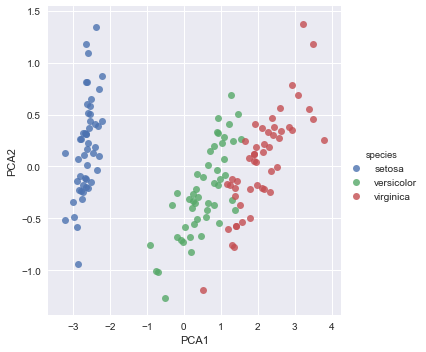

In [41]:
iris['PCA1'] = X_2D[:,0]
iris['PCA2'] = X_2D[:,1]
sns.lmplot('PCA1', 'PCA2', hue = 'species', data = iris, fit_reg = False)

## GMM

In [45]:
from sklearn.mixture import GMM
model = GMM(n_components = 3, covariance_type = 'full')
model.fit(X_iris)
y_gmm = model.predict(X_iris)

E:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
E:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
E:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
E:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecat

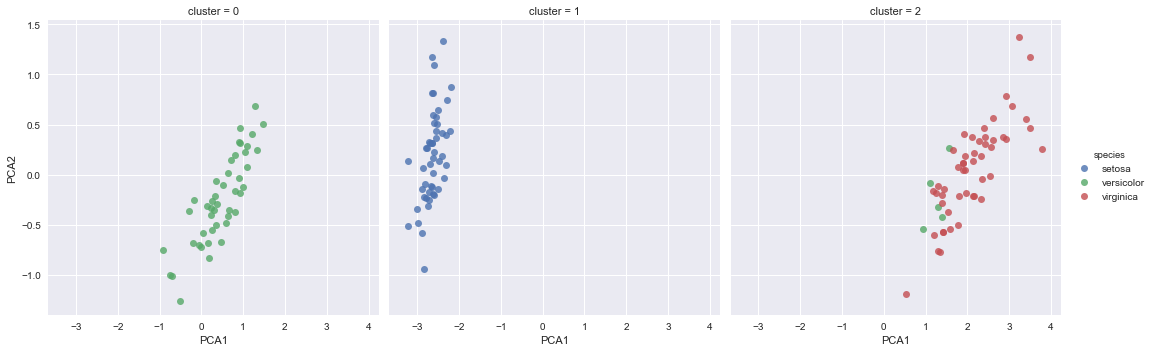

In [51]:
iris['cluster'] = y_gmm
#iris['cluster']
sns.lmplot('PCA1', 'PCA2', data = iris, hue = 'species', col = 'cluster', fit_reg = False)

## Exploring Hand-Written Digits

In [59]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape
digits

{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

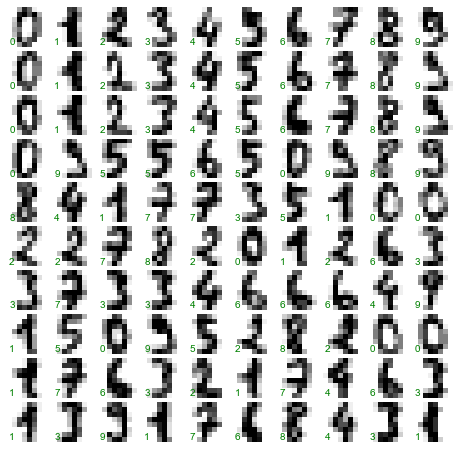

In [55]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [56]:
X = digits.data
X.shape

(1797, 64)

In [58]:
y = digits.target
y.shape

(1797,)

## Isomap

In [60]:
from sklearn.manifold import Isomap
iso = Isomap(n_components = 2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

E:\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


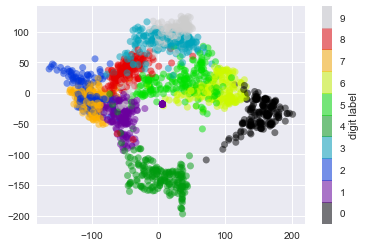

In [61]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

In [67]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 0)
ytrain.shape

(1347,)

In [68]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.83333333333333337

In [71]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)

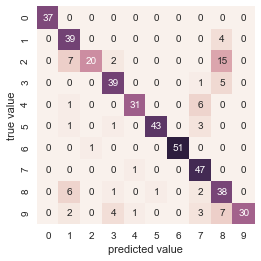

In [73]:
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

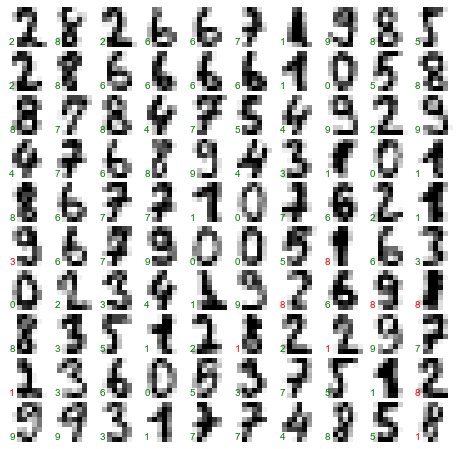

In [74]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')